## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 (In[1], In[2])
- 從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [1]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'


In [2]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:200]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg\nn00015388_304\thttp://farm1.static.flickr.com/27/51'

In [3]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\n'

data_splited = data.split(split_tag) 
print(len(data_splited))
print(data_splited[0])
print(data_splited[-1]) #因為 data 最後出現一個 \n 所以導致data_splited 的最後一項為空白

del data_splited[-1] #將最後一個空白的item刪掉
print(len(data_splited)) #正確的長度

9996
n00015388_157	http://farm1.static.flickr.com/145/430300483_21e993670c.jpg

9995


## 將 txt 轉成 pandas dataframe

In [4]:
import pandas as pd

ids = []
urls = []
for i in range(len(data_splited)):
    tmp = data_splited[i].split('\t')
    ids.append(tmp[0])
    urls.append(tmp[1])

list_labels = ['id', 'url']
arrange_data = dict(list(zip(list_labels, [ids, urls])))
    
df = pd.DataFrame(arrange_data)
df.head()

print()

## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

http://farm1.static.flickr.com/145/430300483_21e993670c.jpg


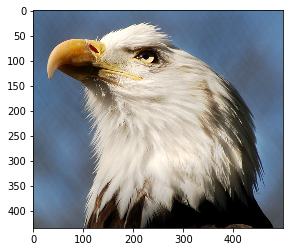

In [5]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df['url'].loc[0]
print(first_link)
response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

In [6]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list = []
    for i in range(len(url_list)):
        response = requests.get(url_list[i])
        try:
            img = Image.open(BytesIO(response.content)) #有可能有連結失效 (需用TRY except )
        except IOError:
            print('第%d個連結已經失效'%(i+1))
            continue
        img_list.append(img)
    
    return img_list

第5個連結已經失效
第6個連結已經失效
第7個連結已經失效
第8個連結已經失效
第9個連結已經失效
Total images that we got: 5 


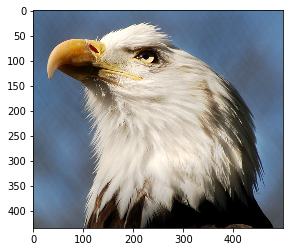

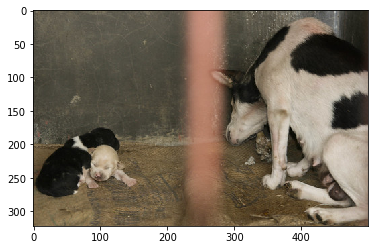

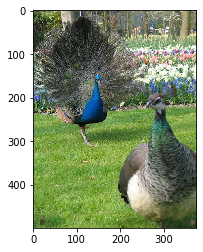

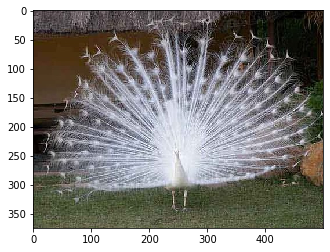

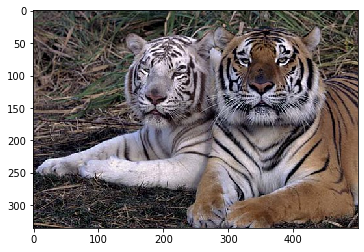

In [7]:
result = img2arr_fromURLs(df['url'][0:10].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()